In [6]:
# Dependencies
import pandas as pd

# Store filepath in a variable
census_data = "chicago_census_data.csv"
vaccine_data = "COVID-19_Vaccinations_by_ZIP_Code.csv"
census_df = pd.read_csv(census_data, encoding="ISO-8859-1")
vaccine_df = pd.read_csv(vaccine_data,encoding="ISO-8859-1")

In [7]:
#cleaning census so Zip Code column matches Vaccinee CSV Zip Code
census_df = census_df.rename(columns={"Zipcode":"Zip Code"})
census_df.dtypes

Zip Code               int64
Population             int64
Median Age           float64
Household Income       int64
Per Capita Income      int64
Poverty Count          int64
Poverty Rate         float64
dtype: object

In [8]:
#getting rid of 'Unknown' values in vaccine df
vaccine_df = vaccine_df[vaccine_df["Zip Code"] != "Unknown"]

In [9]:
#changing Zip Code from Object to int
vaccine_df["Zip Code"]=vaccine_df["Zip Code"].astype(int)

In [10]:
#merging Data
merge_df = pd.merge(vaccine_df, census_df, on="Zip Code")
merge_df
final_df = merge_df.drop(columns=['Row_ID', 'Household Income', 'Population_x', 'Vaccine Series Completed - Daily','Vaccine Series Completed - Cumulative','Vaccine Series Completed  - Percent Population'])
final_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income,Poverty Count,Poverty Rate
0,60603,12/15/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
1,60603,12/16/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
2,60603,12/17/2020,8,8,8,8,0.008,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
3,60603,12/18/2020,6,14,6,14,0.013,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
4,60603,12/19/2020,3,17,3,17,0.016,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,60656,02/09/2021,163,2789,130,2230,0.079,POINT (-87.817934 41.974566),28218,40.1,36778,2129,7.544830
5854,60656,02/14/2021,42,3463,37,2768,0.098,POINT (-87.817934 41.974566),28218,40.1,36778,2129,7.544830
5855,60656,12/27/2020,0,197,0,197,0.007,POINT (-87.817934 41.974566),28218,40.1,36778,2129,7.544830
5856,60656,12/26/2020,3,197,3,197,0.007,POINT (-87.817934 41.974566),28218,40.1,36778,2129,7.544830


In [6]:
#median age comparison across zip codes - bar graph - John
#median age comparison to % complete/zip code- if time
#save png for presentation

In [11]:
#create line graphs that compare % complete on last day for each zip code
#to % complete for Chicago using final df (create a new df with final day)
#save as a png lowest average and highest average for presentation
#(See Matplot Lib Day 2 Activity 7)- Eugene
# if time, line graph 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5858 entries, 0 to 5857
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Zip Code                       5858 non-null   int64  
 1   Date                           5858 non-null   object 
 2   Total Doses - Daily            5858 non-null   int64  
 3   Total Doses - Cumulative       5858 non-null   int64  
 4   1st Dose - Daily               5858 non-null   int64  
 5   1st Dose - Cumulative          5858 non-null   int64  
 6   1st Dose - Percent Population  5858 non-null   float64
 7   ZIP Code Location              5858 non-null   object 
 8   Population_y                   5858 non-null   int64  
 9   Median Age                     5858 non-null   float64
 10  Per Capita Income              5858 non-null   int64  
 11  Poverty Count                  5858 non-null   int64  
 12  Poverty Rate                   5858 non-null   f

In [12]:
import matplotlib.pyplot as plt
## make a copy of the final_df
final_date_df = final_df

## Date is a String object, need to convert it to a Datetime object for date comparison 
final_date_df['Date'] = pd.to_datetime(final_date_df['Date'], format='%m/%d/%Y')
final_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5858 entries, 0 to 5857
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Zip Code                       5858 non-null   int64         
 1   Date                           5858 non-null   datetime64[ns]
 2   Total Doses - Daily            5858 non-null   int64         
 3   Total Doses - Cumulative       5858 non-null   int64         
 4   1st Dose - Daily               5858 non-null   int64         
 5   1st Dose - Cumulative          5858 non-null   int64         
 6   1st Dose - Percent Population  5858 non-null   float64       
 7   ZIP Code Location              5858 non-null   object        
 8   Population_y                   5858 non-null   int64         
 9   Median Age                     5858 non-null   float64       
 10  Per Capita Income              5858 non-null   int64         
 11  Poverty Count    

In [13]:
## Create a data series with zip code and max date
zip_date_ser = final_date_df.groupby('Zip Code')['Date'].max()
zip_date_ser.reset_index()

## Create a dataframe for merging with the original dataframe
zip_date_df = pd.DataFrame(zip_date_ser)

## Merge on Zip Code and max date via left join
final_max_date_df = pd.merge(zip_date_df, final_date_df, on=("Date"), how="left")
final_max_date_df.head(3)

,Date,Zip Code,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income,Poverty Count,Poverty Rate
0,2021-03-25,60603,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
1,2021-03-25,60604,4,690,3,432,0.525,POINT (-87.629029 41.878153),823,32.2,101652,171,20.777643
2,2021-03-25,60608,903,36794,802,27423,0.343,POINT (-87.670366 41.849879),80059,32.6,23525,13468,16.822593


In [14]:
## Add a column of % complete on last day for each zip code
final_max_date_df['1st_dose_percent_complete'] = round(final_max_date_df['1st Dose - Cumulative'] * 100 /final_max_date_df['Population_y'], 2)

## calcuate the mean % complete of Chicago: 
percent_1st_dose_complete_Chicago = round(final_max_date_df['1st Dose - Cumulative'].sum() * 100 / final_max_date_df['Population_y'].sum(), 2)
print(f"percent_1st_dose_complete_Chicago = {percent_1st_dose_complete_Chicago}")

percent_1st_dose_complete_Chicago = 24.51


In [15]:
final_max_date_df.head(3)

,Date,Zip Code,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income,Poverty Count,Poverty Rate,1st_dose_percent_complete
0,2021-03-25,60603,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099,59.22
1,2021-03-25,60604,4,690,3,432,0.525,POINT (-87.629029 41.878153),823,32.2,101652,171,20.777643,52.49
2,2021-03-25,60608,903,36794,802,27423,0.343,POINT (-87.670366 41.849879),80059,32.6,23525,13468,16.822593,34.25


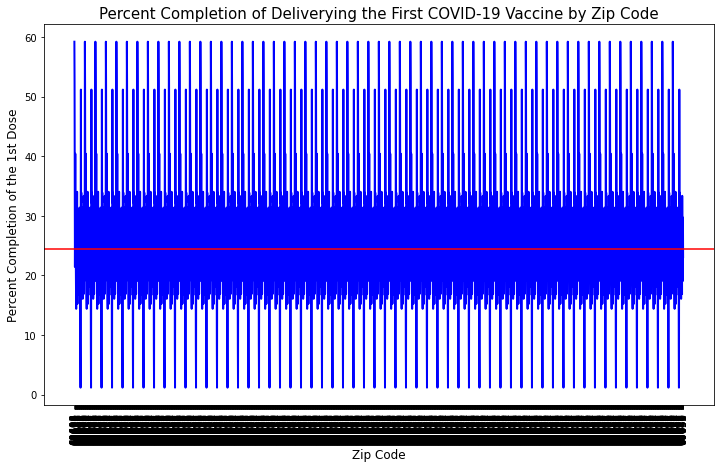

<Figure size 432x288 with 0 Axes>

In [16]:
## plot the zip code & the percent of the 1st dose completion 

x_axis_label = final_max_date_df["Zip Code"]
x_axis = final_max_date_df.index
y_axis = final_max_date_df["1st_dose_percent_complete"]

fig1, ax1 = plt.subplots(figsize=(12, 7))
plt.title('Percent Completion of Deliverying the First COVID-19 Vaccine by Zip Code',fontsize =15)
plt.plot(x_axis, y_axis,linewidth=2, markersize=0, marker="o",color="blue")
plt.xlabel('Zip Code',fontsize =12)
plt.ylabel('Percent Completion of the 1st Dose',fontsize =12)
## define the xtick labels
plt.xticks(x_axis, x_axis_label, rotation=90)

## draw the chicago city average %1st dose completion
plt.axhline(y = percent_1st_dose_complete_Chicago, color = 'r', linestyle = '-')

## Note: Comment out the plt.show() will remove the "Figure size description"
plt.show()
plt.tight_layout()

In [17]:
#create line graphs that compare % complete on last day for each zip code
#to % complete for Chicago using final df (create a new df with final day)
#save as a png lowest average and highest average for presentation
#(See Matplot Lib Day 2 Activity 7)- Eugene
# if time, line graph

In [18]:
#create heat map of % complete - Sarah 
#save heatmap for presentation

# Calculate the final vaccine count of each zip code
#get a df with the selected columns
vaccine_heatmap_df = final_df[['Zip Code','Date','1st Dose - Daily','1st Dose - Cumulative','1st Dose - Percent Population','Population_y','ZIP Code Location']]

# Start by getting the last (greatest) timepoint for each zip code
groupby_df = pd.DataFrame({"Vaccine Max":vaccine_heatmap_df.groupby("Zip Code")["1st Dose - Cumulative"].max()})

# Merge this group df with the original dataframe to get the # of vaccines at the last timepoint
merged_df = pd.merge(vaccine_heatmap_df, groupby_df, how='outer', on='Zip Code')
greatest_vaccine_df = merged_df.loc[(merged_df["1st Dose - Cumulative"]==merged_df["Vaccine Max"])]
greatest_vaccine_df = greatest_vaccine_df[['Zip Code','Date','1st Dose - Cumulative','Population_y','1st Dose - Percent Population',
                                           'ZIP Code Location']]

#get lat/lng coordinates in a format that gmaps can use (float)
lng_lat_list = greatest_vaccine_df["ZIP Code Location"].tolist()
cleaned = []
for coord in lng_lat_list:
    x = coord.strip("POINT (").strip(")").replace(" ",",")
    cleaned.append(x)
lat = []
lng = []
for coord in cleaned:
    a,b = coord.split(',')
    lat.append(float(a))
    lng.append(float(b))
cleaned_df = pd.DataFrame({"Lat":lat,
                        "Lng":lng,
                       "ZIP Code Location":lng_lat_list})

#add cleaned lat/lng to greatest_vaccine_df
gmaps_merged_df = pd.merge(greatest_vaccine_df, cleaned_df, how='outer', on='ZIP Code Location')
gmaps_merged_df.head()

,Zip Code,Date,1st Dose - Cumulative,Population_y,1st Dose - Percent Population,ZIP Code Location,Lat,Lng
0,60603,2021-03-25,623,1052,0.592,POINT (-87.625473 41.880112),-87.625473,41.880112
1,60604,2021-03-25,432,823,0.525,POINT (-87.629029 41.878153),-87.629029,41.878153
2,60608,2021-03-25,27423,80059,0.343,POINT (-87.670366 41.849879),-87.670366,41.849879
3,60609,2021-03-25,13052,60939,0.214,POINT (-87.653382 41.812017),-87.653382,41.812017
4,60610,2021-03-25,12251,40548,0.302,POINT (-87.63581 41.90455),-87.635810,41.904550


In [19]:
#import the zip code boundaries using the geojson from https://data.cityofchicago.org/
import gmaps
gmaps.configure(api_key='Add API KEY HERE')

with open('chicago_boundaries.geojson') as f:
    geometry = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'chicago_boundaries.geojson'

In [20]:
#load vaccine completion percentage data
zipcodes = gmaps_merged_df["Zip Code"].to_list()
vaccine_percent = gmaps_merged_df["1st Dose - Percent Population"].round(4).to_list()
rows = list(zip(zipcodes,vaccine_percent))
zipcode2vaccine = dict(rows)

In [21]:
#map colors to vaccine completion percentage
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
def calculate_color(vaccine_percentage):
    inverse_vaccine = 1.0 - vaccine_percentage
    matpltlib_color = viridis(inverse_vaccine)
    gmaps_color = to_hex(matpltlib_color,keep_alpha=False)
    return gmaps_color

colors = []
for feature in geometry['features']:
    zipcode = feature['properties']['zip']
    zipcode = int(zipcode)
    try:
        vaccine_percentage = zipcode2vaccine[zipcode]
        color = calculate_color(vaccine_percentage)
    except KeyError:
        # no zipcode: return default color
        color = (0, 0, 0, 0.3)
    colors.append(color)

fig = gmaps.figure()
vaccine_layer = gmaps.geojson_layer(
    geometry,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
fig.add_layer(vaccine_layer)
fig

NameError: name 'geometry' is not defined